# Classification με MLP neural network
- Επιλέχθηκαν 1000 εικόνες από την κάθε κλάση και τοποθετήθηκαν στον αντίστοιχο φάκελο χειροκίνητα, η επιλογή έγινε με βάση τα ελάχιστα δεδομένα που απαιτούσε η εργασία.
- θυμίζω έγινε ενα χώρισμα των κλάσεων ανάμεσα σε εμένα (Οδυσσέας) και την Δήμητρα λόγω προβλήματος έλλειψης labels στα δικά της data, όπως είχαμε συζητήσει ακι στο μάθημα.

## Άνοιγμα των φακέλων διαδοχικά και εισαγωγή των εικόνων σε numpy arrays

In [1]:
# Load images and labels
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

# # Define the input directory
input_dir = '/Users/odys/Desktop/ML_LOCAL_MAC/archive_1000pics'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through each folder (class name) in the input directory
for category in os.listdir(input_dir):
    category_path = os.path.join(input_dir, category)
    if os.path.isdir(category_path):  # Ensure it's a directory
        for file_name in os.listdir(category_path):
            if file_name.endswith('.jpeg') or file_name.endswith('.png'):  # Check for valid image files
                img_path = os.path.join(category_path, file_name)
                try:
                    # Open and preprocess the image
                    img = Image.open(img_path)
                    img_array = np.array(img)
                    
                    # Append the image and its label
                    images.append(img_array)
                    labels.append(category)  # Use the folder name as the label
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print some information about the loaded data
print(f"Loaded {len(images)} images.")
print(f"Image shape: {images[0].shape} ")
print(f"Labels: {np.unique(labels)}")


Loaded 4000 images.
Image shape: (64, 64) 
Labels: ['AbdomenCT' 'BreastMRI' 'Hand' 'HeadCT']


## Χώρισμα των δεδομένων σε train και test σύνολα.
 

In [2]:
from sklearn.model_selection import train_test_split

# Set random_state for reproducibility
random_state = 42

# Split into train and test only
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.3, random_state=random_state, stratify=labels
)

print(f"Shape Train set: {X_train.shape}, labels: {y_train.shape}")
print(f"Shape Test set: {X_test.shape}, labels:{y_test.shape}")

Shape Train set: (2800, 64, 64), labels: (2800,)
Shape Test set: (1200, 64, 64), labels:(1200,)


## Multi-layer Perceptron
- Η επιλογή των παραμέτρων βασίστηκε στο βιβλίο Practical deep learning : a python-based introduction, Ronald T. Kneusel, αλλά δοκιμάστικαν και χειροκίνητα διαφορετικές τιμές.
- Εξερετικά αοτελέμσατα ακόμα και μετά από 2 iterations που το loss = 0.04 μόνο.
- Ταυτόχρονα είναι οικονομικό ως προς τον χρόνο εκτέλεσης, πράγμα που με έκανε να το συμπαθήσω ιδιαίτερα.

In [3]:
# MLP Neural Network classification on original (non-PCA) data

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Flatten images for classification
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_flat)
X_test_std = scaler.transform(X_test_flat)

# Initialize the MLPClassifier (set random_state for reproducibility)
mlp_orig = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42,
    verbose=True
)

# Fit the model on standardized original training data
mlp_orig.fit(X_train_std, y_train)

# Predict on test set
y_pred = mlp_orig.predict(X_test_std)

# Evaluate
print("MLP (Original Data) Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nMLP (Original Data) Classification Report:\n", classification_report(y_test, y_pred))

Iteration 1, loss = 0.31672839
Iteration 2, loss = 0.04004923
Iteration 3, loss = 0.00553857
Iteration 4, loss = 0.00128475
Iteration 5, loss = 0.00051198
Iteration 6, loss = 0.00028379
Iteration 7, loss = 0.00024392
Iteration 8, loss = 0.00021910
Iteration 9, loss = 0.00019914
Iteration 10, loss = 0.00018944
Iteration 11, loss = 0.00017856
Iteration 12, loss = 0.00017064
Iteration 13, loss = 0.00016297
Iteration 14, loss = 0.00015707
Iteration 15, loss = 0.00015171
Iteration 16, loss = 0.00014654
Iteration 17, loss = 0.00014186
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
MLP (Original Data) Test Accuracy: 0.9933333333333333

MLP (Original Data) Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.99      1.00      1.00       300
   BreastMRI       1.00      1.00      1.00       300
        Hand       1.00      0.98      0.99       300
      HeadCT       0.98      1.00      0.99       300

    

## Αξιολόγιση του μοντέλου
- Confusion matrix
- Classification reporta
- ROC curve

Confusion Matrix:
 [[300   0   0   0]
 [  0 300   0   0]
 [  2   0 293   5]
 [  0   1   0 299]]


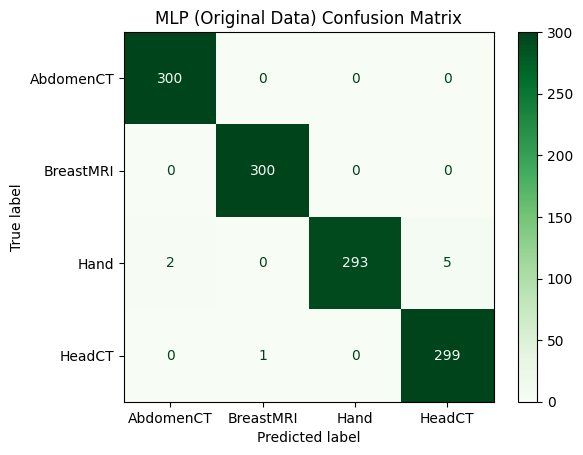

Accuracy: 0.9933
Precision (macro): 0.9934
Recall (macro): 0.9933
F1 Score (macro): 0.9933

Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.99      1.00      1.00       300
   BreastMRI       1.00      1.00      1.00       300
        Hand       1.00      0.98      0.99       300
      HeadCT       0.98      1.00      0.99       300

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



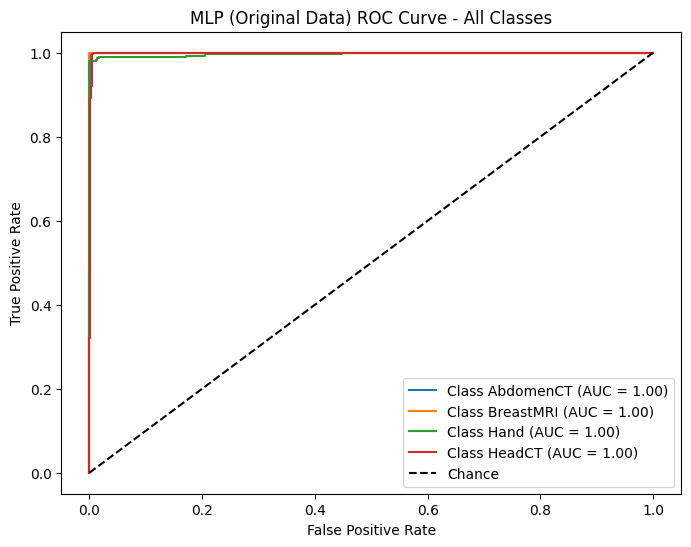

In [6]:
# Assess the model's performance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score,
    recall_score, f1_score, classification_report, roc_curve, auc
)
from sklearn.preprocessing import label_binarize

def assess_model_performance(clf, X_test, y_test, class_labels=None, title_prefix=""):
    """
    Assess and visualize the performance of a classifier.
    
    Parameters:
        clf: Trained classifier
        X_test: Test features
        y_test: True test labels
        class_labels: List of class labels (optional)
        title_prefix: String to prefix plot titles (optional)
    """
    # Predict
    y_pred = clf.predict(X_test)
    if class_labels is None:
        class_labels = np.unique(y_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)
    print("Confusion Matrix:\n", cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Greens)
    plt.title(f"{title_prefix} Confusion Matrix")
    plt.show()

    # Accuracy, Precision, Recall, F1
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"F1 Score (macro): {f1:.4f}")

    # Classification Report
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    # ROC Curve (if possible)
    y_score = None
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
    elif hasattr(clf, "decision_function"):
        y_score = clf.decision_function(X_test)

    if y_score is not None:
        y_test_bin = label_binarize(y_test, classes=class_labels)
        plt.figure(figsize=(8, 6))
        for i, class_label in enumerate(class_labels):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Chance')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{title_prefix} ROC Curve - All Classes')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("ROC curve and AUC not available for this classifier.")

# Assess the MLP model performance
assess_model_performance(mlp_orig, X_test_std, y_test, class_labels=np.unique(y_train), title_prefix="MLP (Original Data)")



## Αναζήτηση και χρήση των βέλτιστων παραμέτρων με χρήση του GridSearchCV
- Το σημαντικό έδω είναι το σύνολο των παραμέτρων (δικιμαζόμενες τιμές) που θα χρησιμοποιήσουμε.
- Εδω έγινε μια αρχή βασιζόμενη στην βιβλιογράφια (Practical deep learning : a python-based introduction, Ronald T. Kneusel. &  Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow,A. Géron ) και έπειτα έγιναν δοκιμές με διαφορετικές τιμές μέχρι να καταλήξει στο σύνολο param_grid που φαίνεται παρακάτω.

In [7]:
# Grid search for best hyperparameters in MLP Neural Network with original (non-PCA) data

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define parameter grid for MLP
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [300]
}

# Initialize MLPClassifier
mlp = MLPClassifier(random_state=42)

# GridSearchCV setup
grid_search_MLP_ORIG = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=1
)

# Fit on original (flattened and standardized) training data
grid_search_MLP_ORIG.fit(X_train_std, y_train)

# Best parameters and score
print("Best parameters found:", grid_search_MLP_ORIG.best_params_)
print("Best cross-validation score:", grid_search_MLP_ORIG.best_score_)

# Evaluate on test set
y_pred = grid_search_MLP_ORIG.predict(X_test_std)
print("MLP Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nMLP Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'adam'}
Best cross-validation score: 0.9950005087470059
MLP Test Accuracy: 0.9941666666666666

MLP Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.99      1.00      1.00       300
   BreastMRI       1.00      1.00      1.00       300
        Hand       1.00      0.98      0.99       300
      HeadCT       0.99      1.00      0.99       300

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



Exception ignored in: <function ResourceTracker.__del__ at 0x10edf40e0>
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes


## Εκτύπωση γραμμής μάθησης για το μοντέλο με βελτιστοποίηση παραμέτρων

[learning_curve] Training set sizes: [ 186  426  666  906 1146 1386 1626 1866]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   34.1s finished


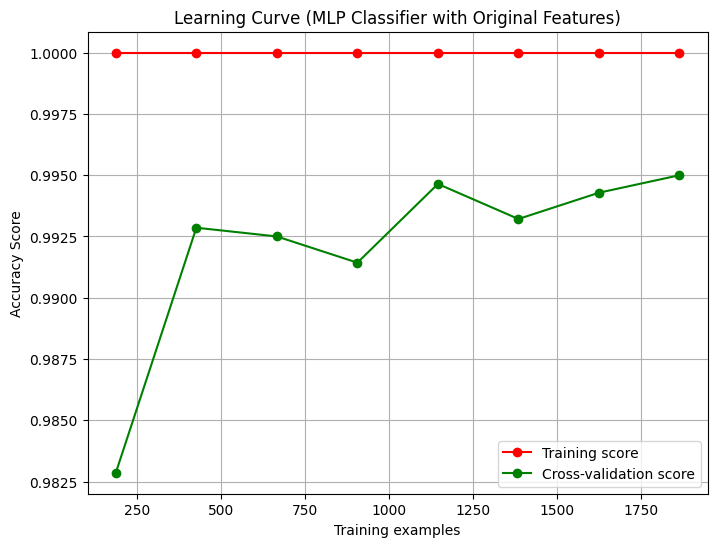

In [8]:
# Plot learning curve for MLP classifier with original (non-PCA) features

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Use the best estimator from grid search on original data
mlp = grid_search_MLP_ORIG.best_estimator_

train_sizes, train_scores, test_scores = learning_curve(
    mlp,
    X_train_std,
    y_train,
    cv=3,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    verbose=1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (MLP Classifier with Original Features)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()